In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cvx.retirement.simulation import simulate, Parameters, Limits
from cvx.retirement.visualize import plot_ecdf

sns.set_theme(font_scale=1.5, style='whitegrid')

%load_ext autoreload
%autoreload 2

# Global variables

In [3]:
collar = True

age_start = 65
age_end = 119

w_stocks_B = 0.2
w_stocks_I = 0.6
w_stocks_R = 0.6

rho_B = 1 + 0.034
rho_I = 1 + 0.048
rho_R = 1 + 0.048

# Upper middle class

In [4]:
sex = 'F'

B_init = 200.
I_init = 400.
R_init = 200.

capital_tax_rate = 0.15

e = pd.Series(np.zeros(120), index=range(120))
a = pd.Series(np.zeros(120), index=range(120))
a[70:] = 3.938 * 12

c0 = (B_init + I_init + R_init + a.loc[age_start:85].sum() + e[age_start:85].sum()) * 0.0375

parameters = Parameters(
    B_init=B_init,
    I_init=I_init,
    R_init=R_init,
    age_start=age_start,
    age_end=age_end,
    w_stocks_B=w_stocks_B,
    w_stocks_I=w_stocks_I,
    w_stocks_R=w_stocks_R,
    rho_B=rho_B,
    rho_I=rho_I,
    rho_R=rho_R,
    a=a,
    c0=c0,
    sex=sex,
    collar=collar,
)

results_MPC = simulate(parameters, n_sims=1_000, algo='MPC', seed=9)
results_4p = simulate(parameters, n_sims=1_000, algo='4_percent', seed=9)

100%|██████████| 1000/1000 [00:29<00:00, 33.63it/s]


In [ ]:
save = 'upper'
if save:
    results_MPC.ret_adj_B.to_csv('cache/results_MPC_ret_adj_B.csv')
    results_MPC.ret_adj_I.to_csv('cache/results_MPC_ret_adj_I.csv')
    results_MPC.ret_adj_R.to_csv('cache/results_MPC_ret_adj_R.csv')

    results_MPC.q.to_csv(f'cache/MPC_{save}_bequests.csv')
    results_MPC.c.to_csv(f'cache/MPC_{save}_cash.csv')

In [ ]:
ret_adj_B = pd.read_csv('cache/ret_adj_B.csv', index_col=0).squeeze()
ret_adj_I = pd.read_csv('cache/ret_adj_I.csv', index_col=0).squeeze()
ret_adj_R = pd.read_csv('cache/ret_adj_R.csv', index_col=0).squeeze()

# OLD

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import summarize, summarize2, plot_ecdf, Parameters
from data import load_data
from backtest import simulate
from black_scholes import get_collar

sns.set_theme(font_scale=1.5, style='whitegrid')

%load_ext autoreload
%autoreload 2

# Global variables

In [2]:
data = load_data()

deterministic = False

age_start = 65
age_end = 119
collar = True

w_stocks_B = 0.2
w_stocks_I = 0.6
w_stocks_R = 0.6

if collar:
    rho_B = 1 + 0.03425266018771696
    rho_I = 1 + 0.04838940099659375
    rho_R = 1 + 0.04838940099659375

    # rho_I = 1 + 0.06961658806402
    # rho_R = 1 + 0.06961658806402


    # rho_B = 1 + w_stocks_B * data.sp500.mean() + (1 - w_stocks_B) * data.treasury.mean() - data.inflation.mean()
    # rho_I = 1 + w_stocks_I * data.sp500.mean() + (1 - w_stocks_I) * data.treasury.mean() - data.inflation.mean()
    # rho_R = 1 + w_stocks_R * data.sp500.mean() + (1 - w_stocks_R) * data.treasury.mean() - data.inflation.mean()
else:
    raise NotImplementedError("This is the collar notebook")

d_max = 8

s1=2.5
s2=0.75

# Upper middle class

In [3]:
sex = 'F' 

B_init = 200.; shares = 1.; basis = B_init / 2; price = B_init
I_init = 400.
R_init = 200.

capital_tax_rate = 0.15

gamma = 500.

e = pd.Series(np.zeros(120), index=range(120))
a = pd.Series(np.zeros(120), index=range(120))
a[70:] = 3.938 * 12
l = pd.Series(np.zeros(120), index=range(120))
c0 = (B_init + I_init + R_init + a.loc[age_start:85].sum() + e[age_start:85].sum()) * 0.0375

parameters = Parameters(B_init=B_init,
                        I_init=I_init,
                        R_init=R_init,
                        basis=basis,
                        price=price,
                        shares=shares,
                        age_start=age_start,
                        age_end=age_end,
                        sex=sex,
                        collar=collar,
                        rho_B=rho_B,
                        rho_I=rho_I,
                        rho_R=rho_R,
                        e=e,
                        a=a,
                        l=l,
                        d_max=d_max,
                        c0=c0,
                        gamma=gamma,
                        w_stocks_B=w_stocks_B,
                        w_stocks_I=w_stocks_I,
                        w_stocks_R=w_stocks_R,
                        k=data.inflation.median(),
                        s1=s1,
                        s2=s2,
                        deterministic=deterministic,
                        capital_tax_rate=capital_tax_rate)

simulation_MPC = simulate(data, parameters, n_runs=1000, algo='MPC', seed=9);
simulation_4p = simulate(data, parameters, n_runs=1000, algo='4_percent', seed=9);

100%|██████████| 1000/1000 [00:29<00:00, 34.11it/s]


In [46]:
69.642 / 65.057

1.0704766589298613

In [28]:
pd.Series(simulation_MPC.cash_matrix.values.flatten()).quantile([0.0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.0])

0.00    42.512741
0.01    58.353600
0.10    58.353600
0.25    58.353600
0.50    58.353600
0.75    58.353600
0.90    58.353600
0.99    58.353600
1.00    58.353600
dtype: float64

In [15]:
simulation_MPC.bequests.quantile([0.0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.0])

0.00        2.137179
0.01      120.586222
0.10      450.886314
0.25      633.179887
0.50      874.182596
0.75     1453.279872
0.90     2359.288388
0.99     5509.228101
1.00    12228.696818
dtype: float64

0.00    0.84
0.01    1.00
0.05    1.00
0.25    1.00
0.50    1.00
0.75    1.00
0.95    1.00
0.99    1.00
1.00    1.19
dtype: float64
0.00           0.76
0.01           0.91
0.05           0.96
0.25           1.01
0.50           1.07
0.75           1.14
0.95           1.25
0.99           1.34
1.00    38465158.64
dtype: float64


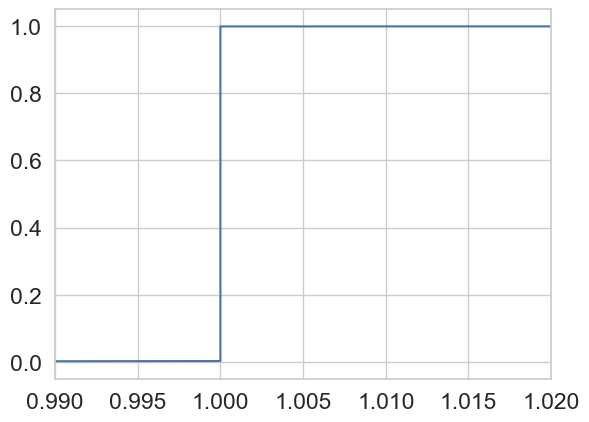

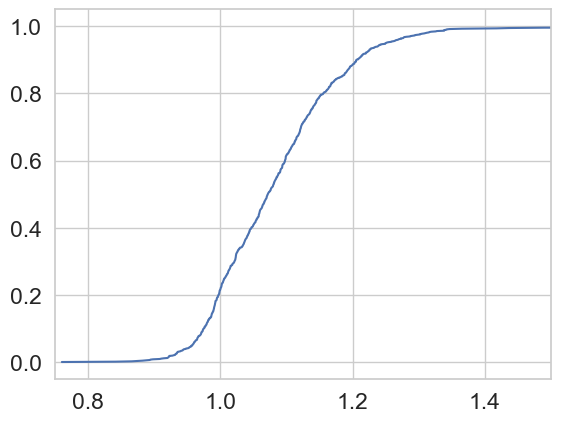

In [4]:
save = False

c_relative = pd.Series((simulation_MPC.cash_matrix / simulation_4p.cash_matrix).values.flatten()).dropna()
plot_ecdf(c_relative)
plt.xlim(0.99, 1.02)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/c_relative_collar_{save}.png', bbox_inches='tight')

plt.figure()
q_relative = pd.Series((simulation_MPC.bequests / simulation_4p.bequests).values.flatten()).dropna()
plot_ecdf(q_relative)
plt.xlim(0.75, 1.5)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/q_relative_collar_{save}.png', bbox_inches='tight')

print(c_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))
print(q_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))



### Portfolio returns

In [5]:
ret_adj_B = pd.Series(simulation_MPC.ret_adj_matrix_B.values.flatten()).dropna()
ret_adj_I = pd.Series(simulation_MPC.ret_adj_matrix_I.values.flatten()).dropna()
ret_adj_R = pd.Series(simulation_MPC.ret_adj_matrix_R.values.flatten()).dropna()
ret_adj_B.to_csv('cache/ret_adj_B_collar.csv')
ret_adj_I.to_csv('cache/ret_adj_I_collar.csv')
ret_adj_R.to_csv('cache/ret_adj_R_collar.csv')

In [39]:
ret_adj_B.mean(), ret_adj_I.mean(), ret_adj_R.mean()

(np.float64(0.03366691401578542),
 np.float64(0.05374071743748281),
 np.float64(0.05374071743748281))

<Axes: >

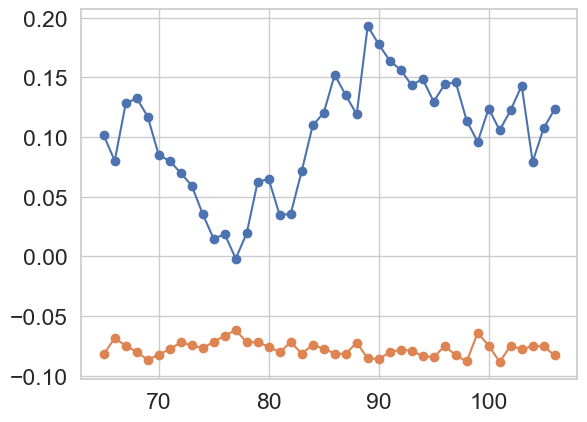

In [32]:
simulation_MPC.ceiling_R.iloc[:, 307].plot(marker='o')
simulation_MPC.floor_R.iloc[:, 307].plot(marker='o')

<Axes: >

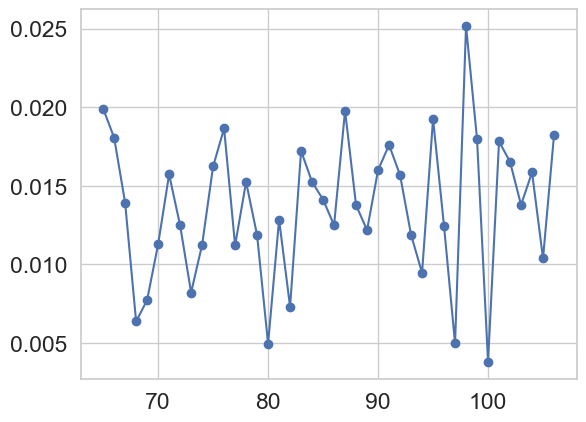

In [65]:
simulation_MPC.inflation_matrix.iloc[:, 307].plot(marker='o')

<Axes: >

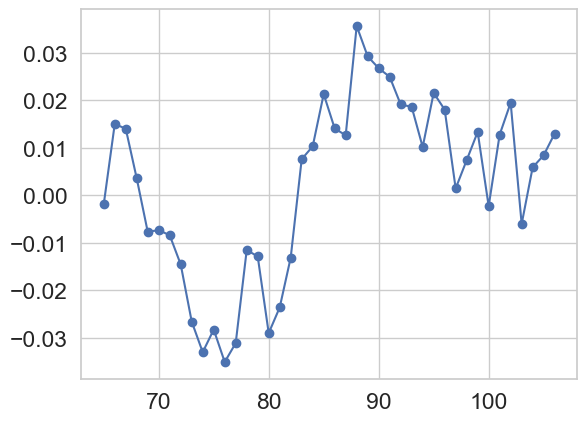

In [71]:
simulation_MPC.treasury_matrix.iloc[:, 307].plot(marker='o')

<Axes: >

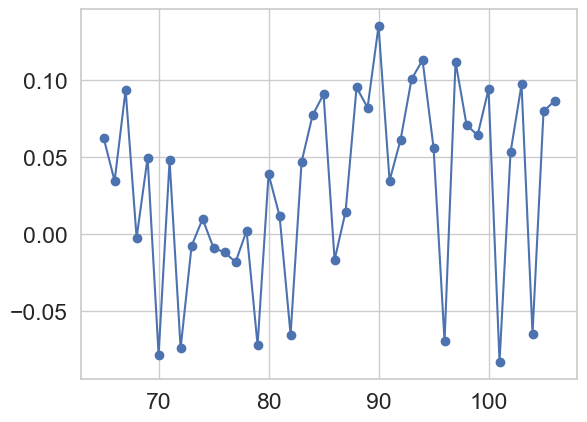

In [70]:
simulation_MPC.ret_adj_matrix_R.iloc[:, 307].dropna().plot(marker='o')

<Axes: >

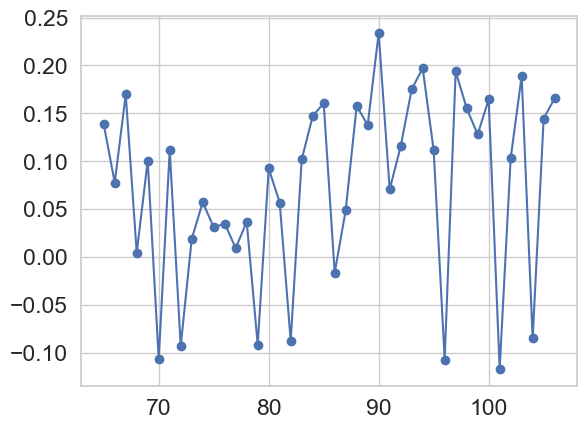

In [68]:
simulation_MPC.return_matrix_R.iloc[:, 307].dropna().plot(marker='o')

In [6]:
matrix = pd.DataFrame(simulation_4p.B_matrix.values + simulation_4p.I_matrix.values + simulation_4p.R_matrix.values)
print(f'Benchmark broke {(matrix.ffill().iloc[-1] < 1).mean():.2%} of the time')

matrix = pd.DataFrame(simulation_MPC.B_matrix.values + simulation_MPC.I_matrix.values + simulation_MPC.R_matrix.values)
print(f'MPC broke {(matrix.ffill().iloc[-1] < 1).mean():.2%} of the time')

Benchmark broke 0.30% of the time
MPC broke 0.00% of the time


In [7]:
simulation_MPC.bequests.to_csv('cache/MPC_upper_bequests_collar.csv')
pd.Series(simulation_MPC.cash_matrix.values.flatten()).dropna().to_csv('cache/MPC_upper_cash_collar.csv')

In [58]:
pd.Series(simulation_MPC.cash_matrix.values.flatten()).dropna()

0        58.3536
1        58.3536
2        58.3536
3        58.3536
4        58.3536
          ...   
38899    58.3536
39307    58.3536
39899    58.3536
40307    58.3536
41307    58.3536
Length: 20433, dtype: float64

# Lower middle class

In [49]:
sex = 'M' 

B_init = 50.; shares = 1.; basis = B_init / 2; price = B_init
I_init = 100.
R_init = 0.

capital_tax_rate = 0.15

gamma = 500.

e = pd.Series(np.zeros(120), index=range(120))
a = pd.Series(np.zeros(120), index=range(120))
a[70:] = 2.013 * 12
l = pd.Series(np.zeros(120), index=range(120))
c0 = (B_init + I_init + R_init + a.loc[age_start:85].sum() + e[age_start:85].sum()) * 0.0375

parameters = Parameters(B_init=B_init,
                        I_init=I_init,
                        R_init=R_init,
                        basis=basis,
                        price=price,
                        shares=shares,
                        age_start=age_start,
                        age_end=age_end,
                        sex=sex,
                        collar=collar,
                        rho_B=rho_B,
                        rho_I=rho_I,
                        rho_R=rho_R,
                        e=e,
                        a=a,
                        l=l,
                        d_max=d_max,
                        c0=c0,
                        gamma=gamma,
                        w_stocks_B=w_stocks_B,
                        w_stocks_I=w_stocks_I,
                        w_stocks_R=w_stocks_R,
                        k=data.inflation.median(),
                        s1=s1,
                        s2=s2,
                        deterministic=deterministic,
                        capital_tax_rate=capital_tax_rate)

simulation_MPC = simulate(data, parameters, n_runs=1000, algo='MPC', seed=9)
simulation_4p = simulate(data, parameters, n_runs=1000, algo='4_percent', seed=9)

100%|██████████| 1000/1000 [15:35<00:00,  1.07it/s]


0.00    1.0
0.01    1.0
0.05    1.0
0.25    1.0
0.50    1.0
0.75    1.0
0.95    1.0
0.99    1.0
1.00    1.0
dtype: float64
0.00    0.66
0.01    0.75
0.05    0.79
0.25    0.86
0.50    0.92
0.75    0.97
0.95    1.07
0.99    1.20
1.00    1.36
dtype: float64


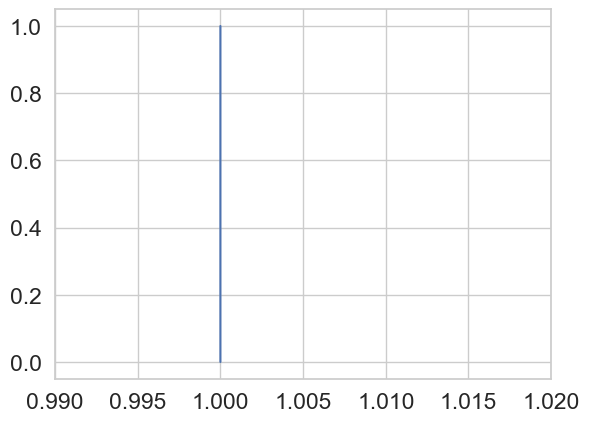

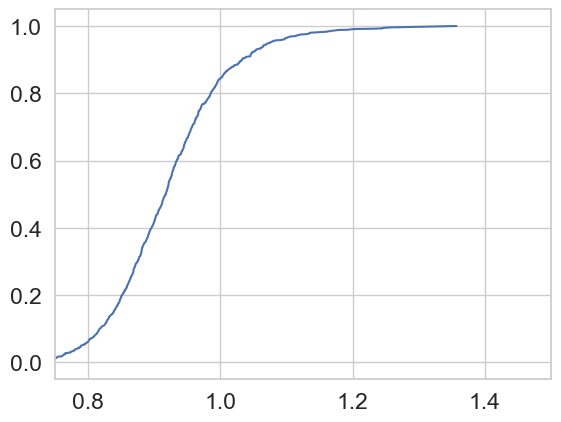

In [6]:
save=False

c_relative = pd.Series((simulation_MPC.cash_matrix / simulation_4p.cash_matrix).values.flatten()).dropna()
plot_ecdf(c_relative)
plt.xlim(0.99, 1.02)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/c_relative_collar_{save}.png', bbox_inches='tight')

plt.figure()
q_relative = pd.Series((simulation_MPC.bequests / simulation_4p.bequests).values.flatten()).dropna()
plot_ecdf(q_relative)
plt.xlim(0.75, 1.5)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/q_relative_collar_{save}.png', bbox_inches='tight')

print(c_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))
print(q_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))



In [50]:
matrix = pd.DataFrame(simulation_4p.B_matrix.values + simulation_4p.I_matrix.values + simulation_4p.R_matrix.values)
print(f'Benchmark broke {(matrix.ffill().iloc[-1] < 1).mean():.2%} of the time')

matrix = pd.DataFrame(simulation_MPC.B_matrix.values + simulation_MPC.I_matrix.values + simulation_MPC.R_matrix.values)
print(f'MPC broke {(matrix.ffill().iloc[-1] < 1).mean():.2%} of the time')

Benchmark broke 0.00% of the time
MPC broke 0.00% of the time


In [51]:
simulation_MPC.bequests.to_csv('cache/MPC_lower_bequests_collar.csv')
pd.Series(simulation_MPC.cash_matrix.values.flatten()).dropna().to_csv('cache/MPC_lower_cash_collar.csv')